In [1]:
import numpy as np
import uproot as ur
import h5py as h5
import matplotlib.pyplot as plt
path_to_h5 = '/home/leonov/Baikal/Gr_data/mc_baikal_norm_cut-8_ordered_with_MCarlo.h5'
with h5.File(path_to_h5, 'r') as hf:
    print(hf["train/data"].shape)

(170301, 52, 5)


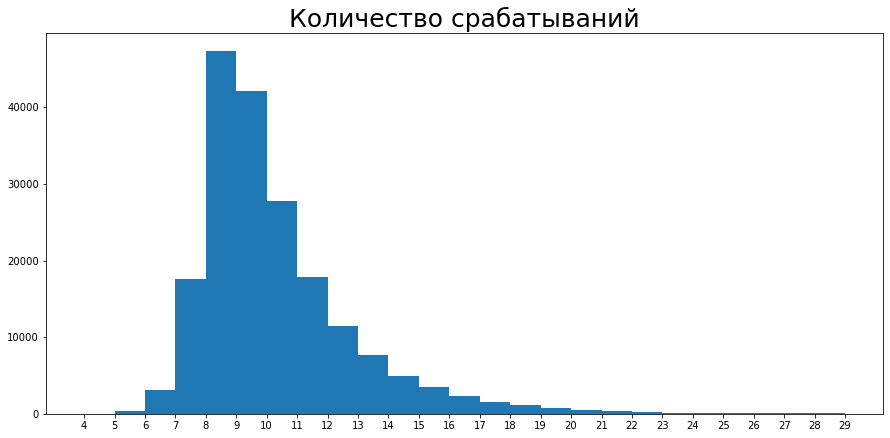

In [148]:
path_to_h5 = '/home/leonov/Baikal/Gr_data/mc_baikal_norm_cut-0_ordered_with_MCarlo.h5'
with h5.File(path_to_h5, 'r') as hf:
    plt.figure(figsize=(15,7))
    a = np.sum(hf["train/mask"],axis =1)
    a = a[a <30]
    a = plt.hist(a,bins = 25)
    plt.xticks(np.arange(4,30))
    plt.title("Количество срабатываний",fontsize = 25)
    plt.show()


In [222]:
length = {i: 0  for i in range(5,27)}
az_res_50 = {i: 0  for i in range(5,27)}
polar_res_50 = {i: 0  for i in range(5,27)}
az_res_68 = {i: 0  for i in range(5,27)}
polar_res_68 = {i: 0  for i in range(5,27)}
resolution_50 = {i: 0  for i in range(5,27)}
resolution_68 = {i: 0  for i in range(5,27)}

In [225]:

def standart_resolution_no_hists(cut ):
    with h5.File(path_to_h5, 'r') as hf:
        print("length =", hf["train/ev_chars"][:,0].shape)
        length[cut] = hf["train/ev_chars"].shape[0]
        #
        a_r = hf["train/ev_chars"][:,1]/180*np.pi
        a_p = hf["train/ev_chars"][:,-2]/180*np.pi 
        polar_real = hf["train/ev_chars"][:,0]/180*np.pi
        polar_pred = hf["train/ev_chars"][:,3]/180*np.pi
        #
        res_az = np.arccos(np.round(np.cos(a_r)*np.cos(a_p)+np.sin(a_r)*np.sin(a_p),6))/np.pi*180
        res_50, res_68 = round(np.percentile(res_az,50),3), round(np.percentile(res_az,68),3)
        #print("Azimut_error 50% and 68%",res_50 ,res_68 )
        az_res_50[cut],az_res_68[cut] = res_50,res_68
        #
        polar_error =np.abs(polar_pred-polar_real)
        res_50, res_68 = round(np.percentile(polar_error*180/np.pi,50),3) , round(np.percentile(polar_error*180/np.pi,68),3)
        #print("Polar_error 50% and 68%",res_50, res_68 ) 
        polar_res_50[cut],polar_res_68[cut] = res_50,res_68 
        #
        x_r = np.sin(polar_real)*np.cos(a_r)
        y_r = np.sin(polar_real)*np.sin(a_r)
        z_r = np.cos(polar_real)
        #
        x_p = np.sin(polar_pred)*np.cos(a_p)
        y_p = np.sin(polar_pred)*np.sin(a_p)
        z_p = np.cos(polar_pred)
        #
        resolution = np.arccos(np.round(x_r*x_p + y_r*y_p + z_r*z_p,6))/np.pi*180
        res_50, res_68 = round(np.percentile(resolution,50),3),round(np.percentile(resolution,68),3)
        #print("Resolution 50% and 68%",res_50, res_68,"\n\n")    
        resolution_50[cut],resolution_68[cut] = res_50, res_68

In [340]:
for i in range(5,27):
    path_to_h5 = "/home/leonov/Baikal/Gr_data/cut equal to/mc_baikal_norm_cut-"+str(i)+"_ordered_with_MCarlo.h5"
    #print("CUT "+str(i))
    standart_resolution_no_hists(i)

length = (308,)
length = (3093,)
length = (17638,)
length = (47309,)
length = (42093,)
length = (27801,)
length = (17891,)
length = (11520,)
length = (7612,)
length = (4996,)
length = (3441,)
length = (2267,)
length = (1559,)
length = (1192,)
length = (812,)
length = (553,)
length = (372,)
length = (247,)
length = (169,)
length = (126,)
length = (77,)
length = (77,)


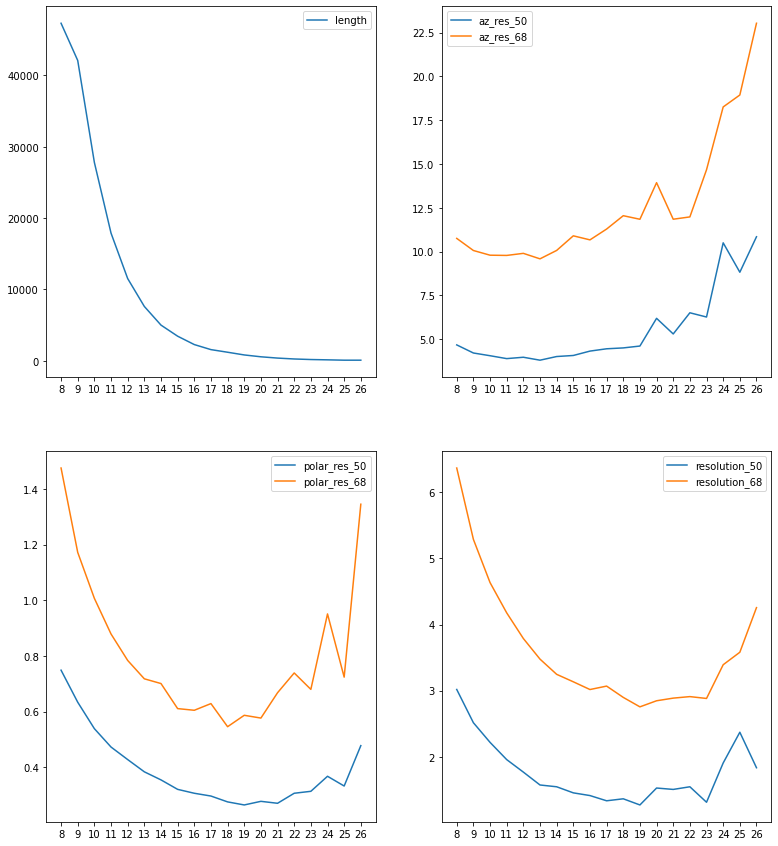

In [345]:
porog =3
list_of_lists= [length,
                az_res_50,az_res_68,
                polar_res_50,polar_res_68,
                resolution_50,resolution_68]
x_list=np.arange(8,27)
plt.figure(figsize=(13,15))
plt.subplot(2,2,1)
plt.plot(x_list,list(length.values())[porog:],label= "length")
plt.xticks(x_list)
plt.legend()
plt.subplot(2,2,2)
plt.plot(x_list,list(az_res_50.values())[porog:],label= "az_res_50")
plt.plot(x_list,list(az_res_68.values())[porog:],label= "az_res_68")
plt.xticks(x_list)
plt.legend()
plt.subplot(2,2,3)
plt.plot(x_list,list(polar_res_50.values())[porog:],label= "polar_res_50")
plt.plot(x_list,list(polar_res_68.values())[porog:],label= "polar_res_68")
plt.xticks(x_list)
plt.legend()
plt.subplot(2,2,4)
plt.plot(x_list,list(resolution_50.values())[porog:],label= "resolution_50")
plt.plot(x_list,list(resolution_68.values())[porog:],label= "resolution_68")
plt.xticks(x_list)
plt.legend()
plt.show()


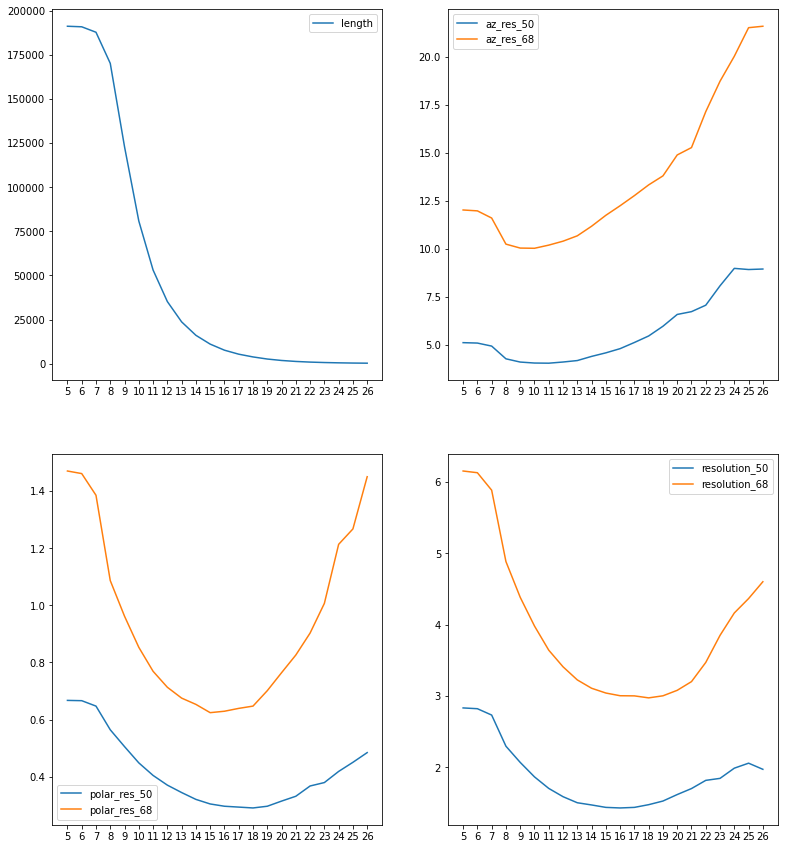

In [241]:
list_of_lists= [length,
                az_res_50,az_res_68,
                polar_res_50,polar_res_68,
                resolution_50,resolution_68]
x_list=np.arange(5,27)
plt.figure(figsize=(13,15))
plt.subplot(2,2,1)
plt.plot(x_list,list(length.values()),label= "length")
plt.xticks(x_list)
plt.legend()
plt.subplot(2,2,2)
plt.plot(x_list,list(az_res_50.values()),label= "az_res_50")
plt.plot(x_list,list(az_res_68.values()),label= "az_res_68")
plt.xticks(x_list)
plt.legend()
plt.subplot(2,2,3)
plt.plot(x_list,list(polar_res_50.values()),label= "polar_res_50")
plt.plot(x_list,list(polar_res_68.values()),label= "polar_res_68")
plt.xticks(x_list)
plt.legend()
plt.subplot(2,2,4)
plt.plot(x_list,list(resolution_50.values()),label= "resolution_50")
plt.plot(x_list,list(resolution_68.values()),label= "resolution_68")
plt.xticks(x_list)
plt.legend()
plt.show()


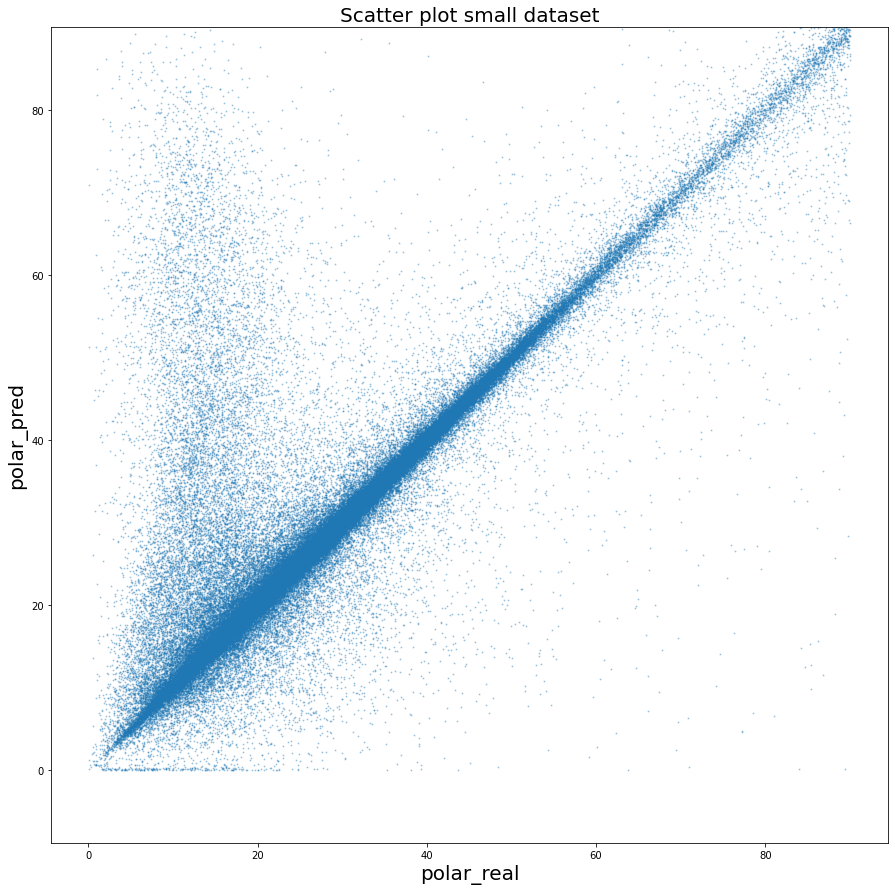

In [4]:
with h5.File(path_to_h5, 'r') as hf:
    plt.figure(figsize= (15,15))
    polar_real = hf["train/ev_chars"][:,0]/180*np.pi
    polar_pred = hf["train/ev_chars"][:,3]/180*np.pi    
    plt.scatter(polar_real*180/np.pi,polar_pred*180/np.pi,s =1,alpha =0.3)
    plt.xlabel("polar_real", fontsize = 20)
    plt.ylabel("polar_pred", fontsize = 20)
    plt.title("Scatter plot small dataset", fontsize = 20)
    plt.ylim(top = 90)

In [7]:
def standart_resolution(path):
    with h5.File(path_to_h5, 'r') as hf:
        plt.figure(figsize= (15,15))
        print("length =", hf["train/ev_chars"].shape[0])
        a_r = hf["train/ev_chars"][:,1]/180*np.pi
        a_p = hf["train/ev_chars"][:,-2]/180*np.pi 
        polar_real = hf["train/ev_chars"][:,0]/180*np.pi
        polar_pred = hf["train/ev_chars"][:,3]/180*np.pi
        plt.subplot(4,2,1)
        plt.hist(a_r*180/np.pi,bins =  100,alpha =0.5,label = "Real Azimut angle",density = True)
        plt.hist(a_p*180/np.pi,bins =  100,alpha =0.5,label = "Reconstructed Azimut angle",density = True)
        plt.title("Azimut",fontsize = 25)
        plt.legend()
        plt.subplot(4,2,2)
        plt.hist(polar_real[polar_real<100/180*np.pi]*180/np.pi,
                 bins =  100,alpha =0.5,label = "Real Polar angle",density = True)
        plt.hist(polar_pred[polar_pred<100/180*np.pi]*180/np.pi,
                 bins =  100,alpha =0.5,label = "Reconstructed Polar angle",density = True)
        plt.title("Polar",fontsize = 25)
        plt.legend()
        #
        plt.subplot(4,2,3)
        res_az = np.arccos(np.round(np.cos(a_r)*np.cos(a_p)+np.sin(a_r)*np.sin(a_p),6))/np.pi*180
        res_hist = plt.hist(res_az[res_az<30], bins = 100, alpha = 0.6, density = True)
        res_50, res_68 = round(np.percentile(res_az,50),3), round(np.percentile(res_az,68),3)
        print("Azimut_error 50% and 68%",res_50 ,res_68 )
        plt.bar(res_50, max(res_hist[0]), width=0.8,label= "Azimut angle 50% resolution = "+str(res_50),
                color="yellow" , alpha =0.8 )
        plt.bar(res_68, max(res_hist[0]), width=0.8,label="Azimut angle 68% resolution = "+str(res_68) ,
                color="orange",alpha = 0.8)
        plt.legend()
        plt.title("Azimut Angle Resolution",fontsize = 25)
        #
        plt.subplot(4,2,4)
        polar_error =np.abs(polar_pred-polar_real)*180/np.pi
        a = plt.hist(polar_error[polar_error<6],bins = 300,density = True)
        res_50, res_68 = round(np.percentile(polar_error,50),3) , round(np.percentile(polar_error,68),3)
        print("Polar_error 50% and 68%",res_50, res_68 ) 
        plt.bar(res_50, max(a[0]), width=0.1,label= "Polar angle 50% resolution = "+str(res_50),
                color="yellow" , alpha =0.9 )
        plt.bar(res_68, max(a[0]), width=0.1,label="Polar angle 68% resolution = "+str(res_68) ,
                color="orange",alpha = 0.9)  
        plt.legend()
        plt.title("Polar Angle Resolution",fontsize = 25)
        #
        x_r = np.sin(polar_real)*np.cos(a_r)
        y_r = np.sin(polar_real)*np.sin(a_r)
        z_r = np.cos(polar_real)
        #
        x_p = np.sin(polar_pred)*np.cos(a_p)
        y_p = np.sin(polar_pred)*np.sin(a_p)
        z_p = np.cos(polar_pred)
        #
        plt.subplot(4,2,5)
        resolution = np.arccos(np.round(x_r*x_p + y_r*y_p + z_r*z_p,6))/np.pi*180
        res_50, res_68 = round(np.percentile(resolution,50),3),round(np.percentile(resolution,68),3)
        a = plt.hist(resolution[resolution<10],bins = 100,density = True)
        plt.bar(res_50, max(a[0]), width=0.1,label= "Direction 50% resolution = "+str(res_50),
                color="yellow" , alpha =0.8 )
        plt.bar(res_68, max(a[0]), width=0.1,label="Direction 68% resolution = "+str(res_68) ,
                color="orange",alpha = 0.8)  
        plt.title("Resolution",fontsize = 25)
        plt.legend()
        print("Resolution 50% and 68%", res_50, res_68)   
        plt.subplot(4,2,6)
        plt.scatter(polar_real*180/np.pi,polar_pred*180/np.pi,s =1)
        plt.xlabel("polar_real")
        plt.ylabel("polar_pred")
        plt.title("Scatter plot")
        plt.ylim(top = 90)

        plt.subplot(4,2,8)
        plt.scatter(a_r*180/np.pi,a_p*180/np.pi,s =1)
        plt.xlabel("Azimut real")
        plt.ylabel("Azimut pred")
        plt.title("Scatter Azimut plot")
standart_resolution(path_to_h5)

length = 170301
Azimut_error 50% and 68% 4.257 10.233
Polar_error 50% and 68% 0.564 1.087
Resolution 50% and 68% 2.296 4.886


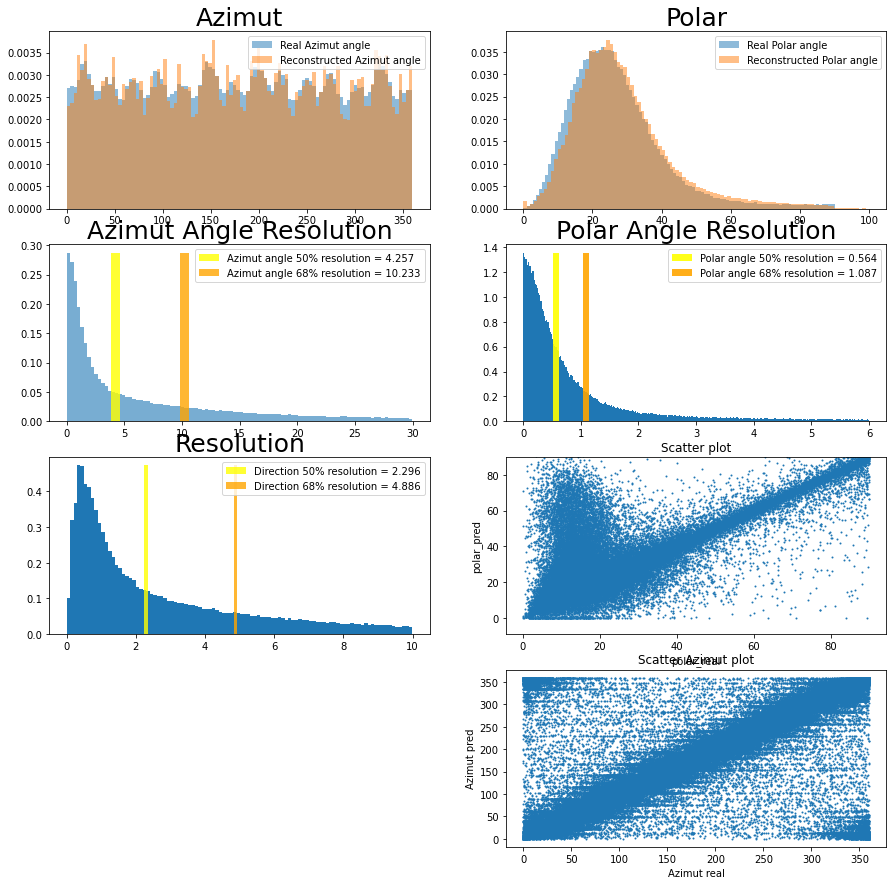

Polar_error 50% and 68% 0.528 0.98


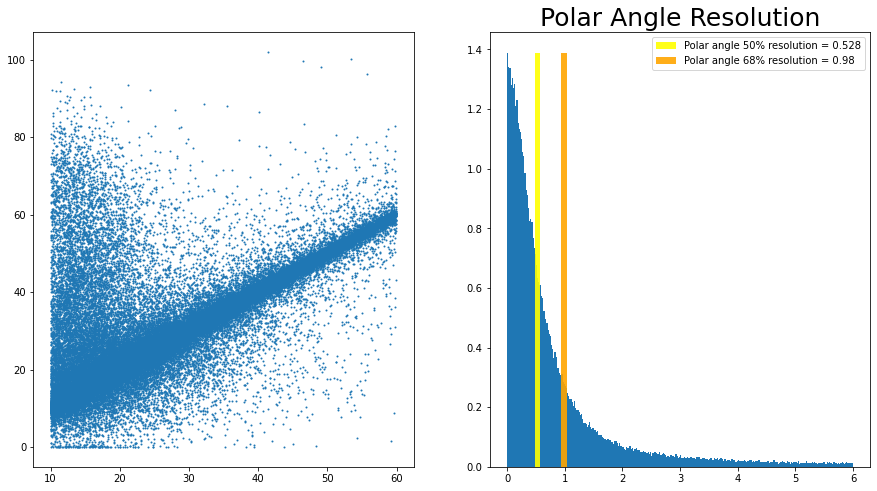

In [319]:
path_to_h5 = '/home/leonov/Baikal/Gr_data/mc_baikal_norm_cut-8_ordered_with_MCarlo.h5'
threshhold_min,threshhold_max =10,60
with h5.File(path_to_h5, 'r') as hf:
    plt.figure(figsize= (15,8))
    plt.subplot(1,2,1)
    polar_real = hf["train/ev_chars"][:,0]
    l_where = np.where( (polar_real >threshhold_min) & (polar_real <threshhold_max))
    
    polar_pred = hf["train/ev_chars"][:,3]
    polar_pred = polar_pred[l_where]
    polar_real = polar_real[(polar_real >threshhold_min) & (polar_real <threshhold_max)]
    plt.scatter(polar_real,polar_pred,s=1)
    plt.subplot(1,2,2)
    polar_error =np.abs(polar_pred-polar_real)
    a = plt.hist(polar_error[polar_error<6],bins = 300,density = True)
    res_50, res_68 = round(np.percentile(polar_error,50),3) , round(np.percentile(polar_error,68),3)
    print("Polar_error 50% and 68%",res_50, res_68 ) 
    plt.bar(res_50, max(a[0]), width=0.1,label= "Polar angle 50% resolution = "+str(res_50),
        color="yellow" , alpha =0.9 )
    plt.bar(res_68, max(a[0]), width=0.1,label="Polar angle 68% resolution = "+str(res_68) ,
            color="orange",alpha = 0.9)  
    plt.legend()
    plt.title("Polar Angle Resolution",fontsize = 25)

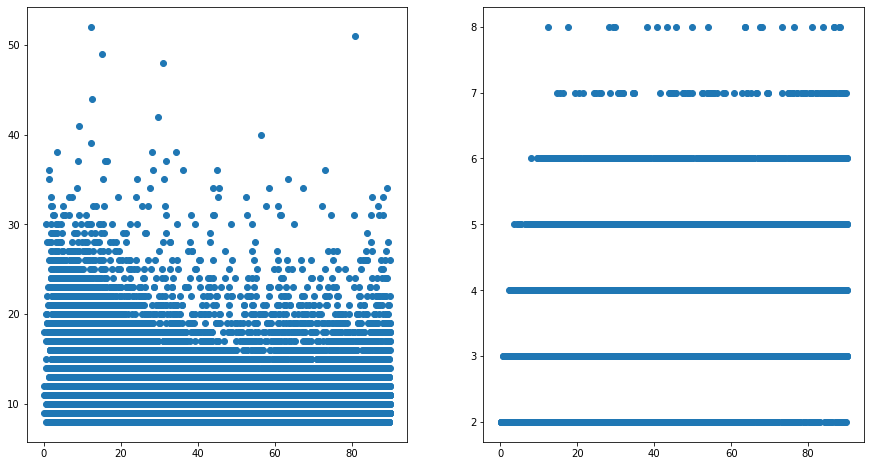

In [318]:
with h5.File(path_to_h5, 'r') as hf:
    plt.figure(figsize= (15,8))
    plt.subplot(1,2,1)
    polar_real = hf["train/ev_chars"][:,0]
    string_amount = hf["train/ev_chars"][:,-1]
    OM = np.sum(hf["train/mask"],axis =1)
    plt.scatter(polar_real,OM)
    plt.subplot(1,2,2)
    plt.scatter(polar_real,string_amount)

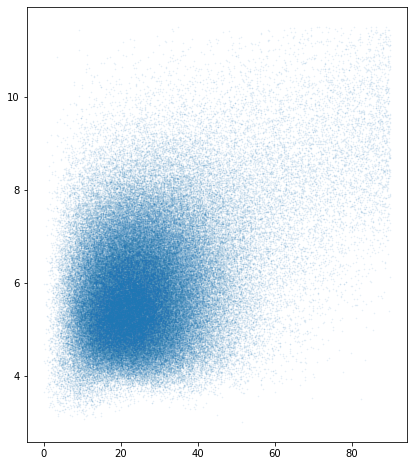

In [339]:
with h5.File(path_to_h5, 'r') as hf:
    plt.figure(figsize= (15,8))
    plt.subplot(1,2,1)
    polar_real = hf["train/ev_chars"][:,0]
    E = np.log(hf["train/ev_chars"][:,2])
    plt.scatter(polar_real,E,s= 0.3,alpha= 0.1)

length = 80899
Azimut_error 50% and 68% 4.037 10.017
Polar_error 50% and 68% 0.448 0.853
Resolution 50% and 68% 1.866 3.982


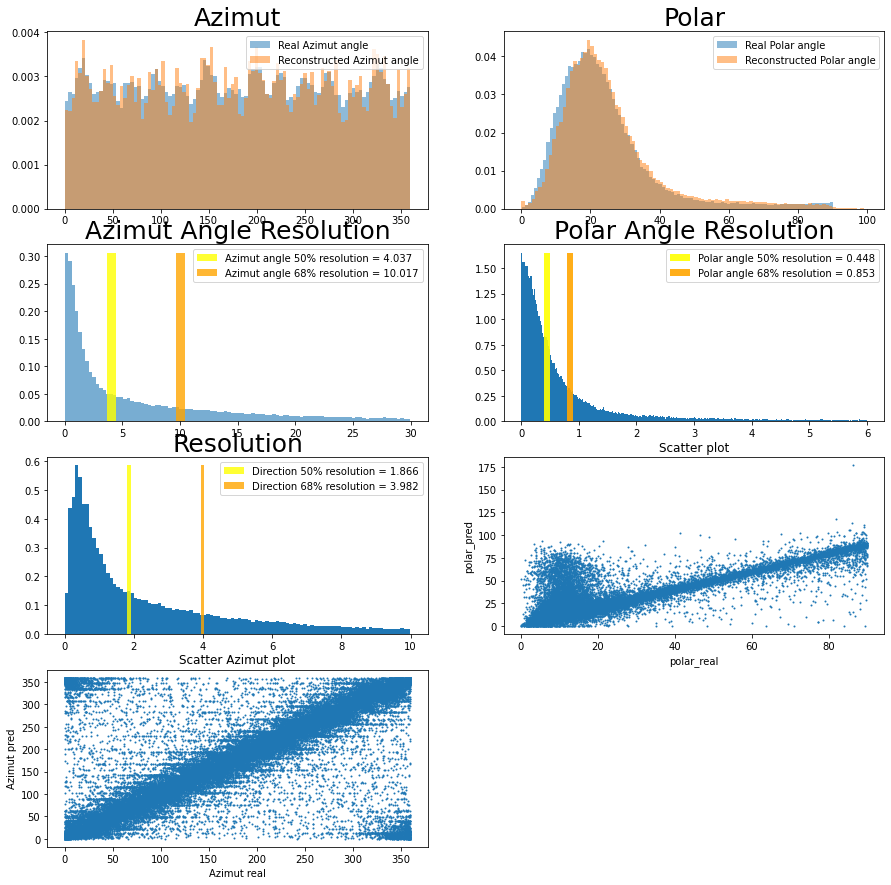

In [291]:
path_to_h5 = '/home/leonov/Baikal/Gr_data/mc_baikal_norm_cut-10_ordered_with_MCarlo.h5'
standart_resolution(path_to_h5)

length = 35207
Azimut_error 50% and 68% 4.09 10.387
Polar_error 50% and 68% 0.37 0.713
Resolution 50% and 68% 1.588 3.41


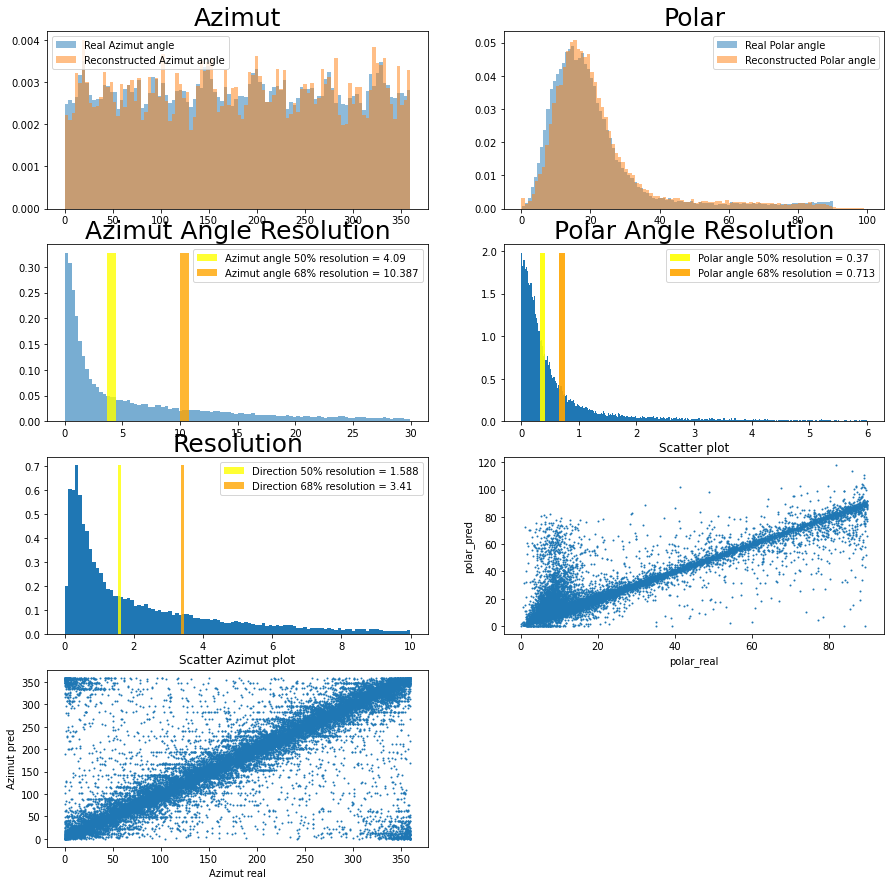

In [293]:
path_to_h5 = '/home/leonov/Baikal/Gr_data/mc_baikal_norm_cut-12_ordered_with_MCarlo.h5'
standart_resolution(path_to_h5)

length = 16075
Azimut_error 50% and 68% 4.383 11.166
Polar_error 50% and 68% 0.32 0.653
Resolution 50% and 68% 1.472 3.109


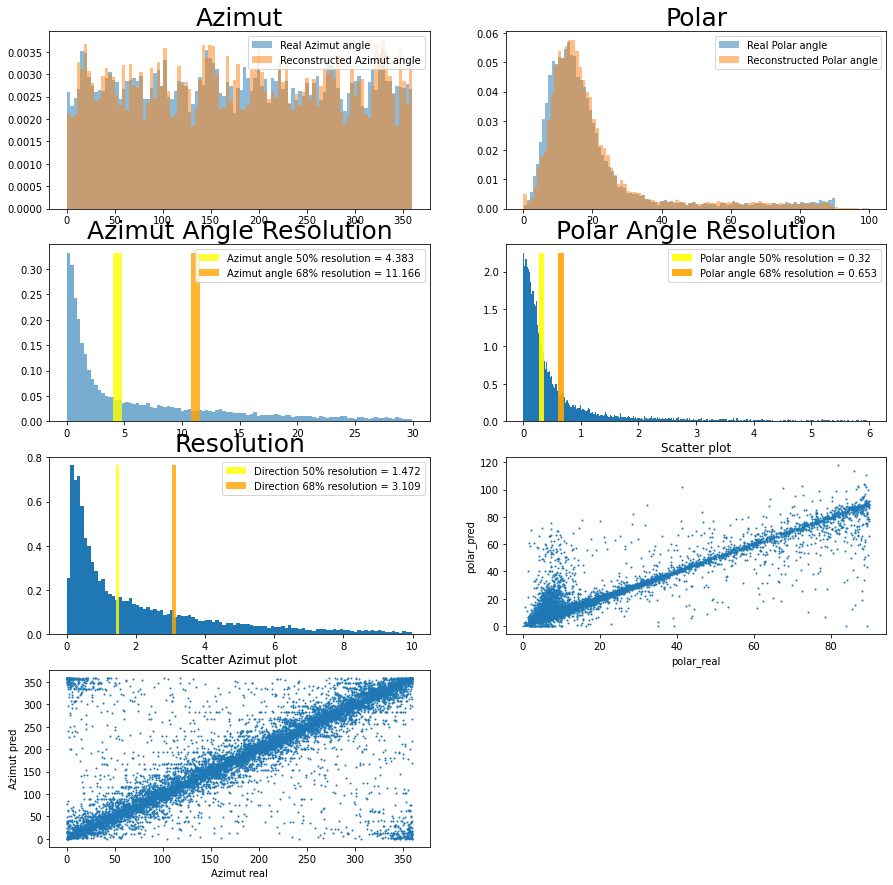

In [294]:
path_to_h5 = '/home/leonov/Baikal/Gr_data/mc_baikal_norm_cut-14_ordered_with_MCarlo.h5'
standart_resolution(path_to_h5)

length = 7638
Azimut_error 50% and 68% 4.787 12.235
Polar_error 50% and 68% 0.296 0.629
Resolution 50% and 68% 1.43 3.004


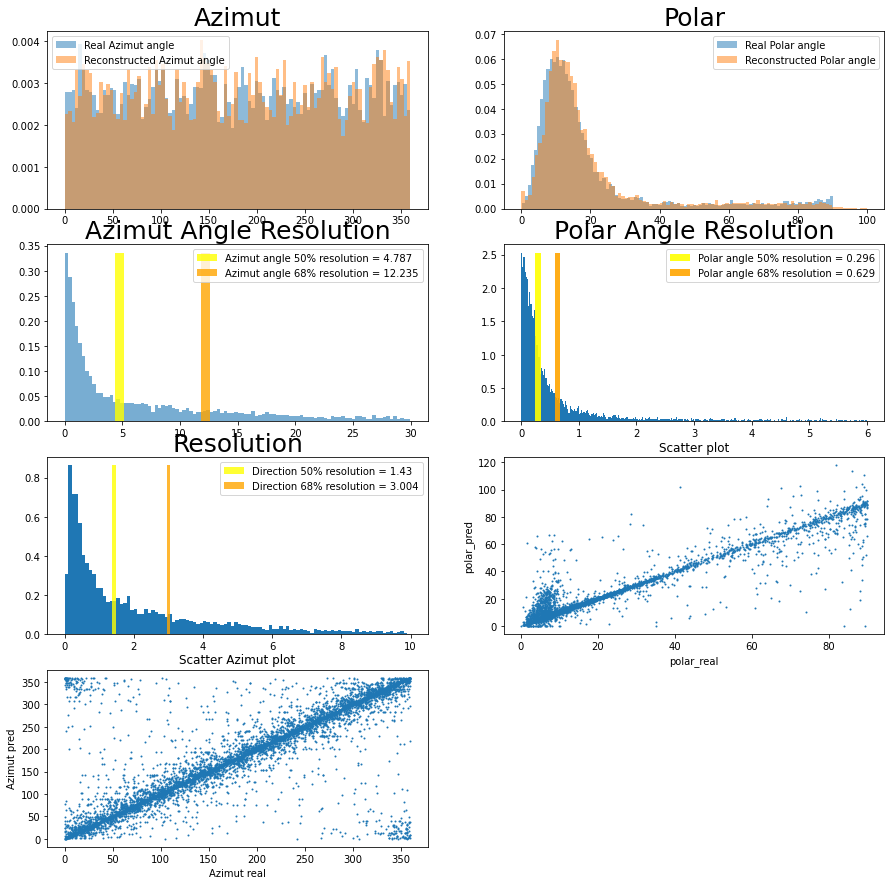

In [295]:
path_to_h5 = '/home/leonov/Baikal/Gr_data/mc_baikal_norm_cut-16_ordered_with_MCarlo.h5'
standart_resolution(path_to_h5)

length = 191340
Azimut_error 50% and 68% 5.0987 12.0127
Polar_error 50% and 68% 0.6674 1.4707
Resolution 50% and 68% 2.8328 6.1563


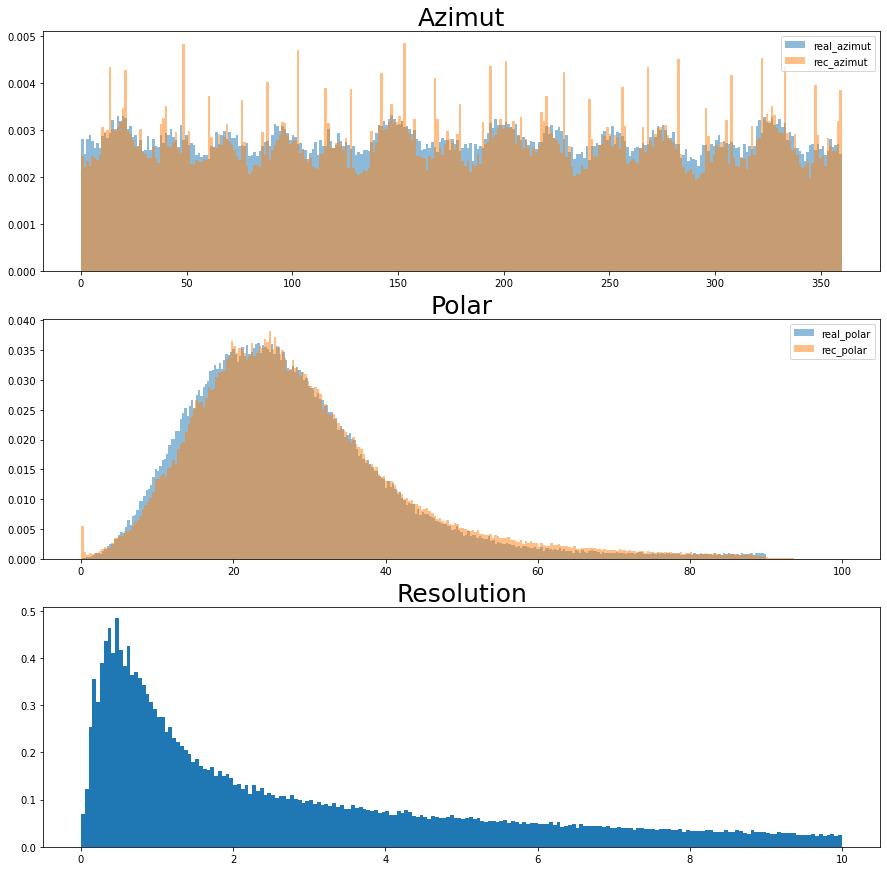

In [161]:
path_to_h5 = '/home/leonov/Baikal/Gr_data/mc_baikal_norm_cut-5_ordered_with_MCarlo.h5'
standart_resolution(path_to_h5)

length = 170301
Azimut_error 50% and 68% 4.2571 10.2325
Polar_error 50% and 68% 0.5644 1.0874
Resolution 50% and 68% 2.2963 4.8861


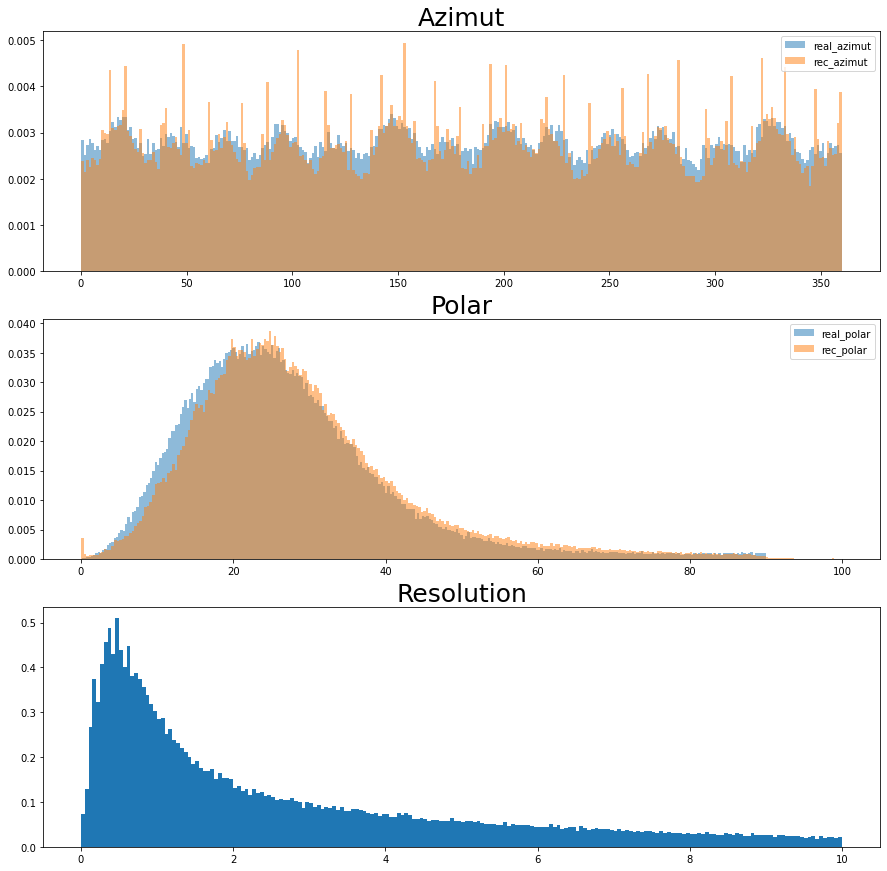

In [162]:
path_to_h5 = '/home/leonov/Baikal/Gr_data/mc_baikal_norm_cut-8_ordered_with_MCarlo.h5'
standart_resolution(path_to_h5)

In [163]:
d = np.round(np.cos(a_r)*np.cos(a_p)+np.sin(a_r)*np.sin(a_p),8)
d[d>1]

array([1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001],
      dtype=float32)

In [366]:
def standart_resolution(path):
    with h5.File(path_to_h5, 'r') as hf:
        plt.figure(figsize= (15,15))
        print("length =", hf["train/ev_chars"].shape[0])
        a_r = hf["train/ev_chars"][:,1]/180*np.pi
        a_p = hf["train/ev_chars"][:,-2]/180*np.pi 
        polar_real = hf["train/ev_chars"][:,0]/180*np.pi
        polar_pred = hf["train/ev_chars"][:,3]/180*np.pi
        plt.subplot(4,2,1)
        plt.hist(a_r*180/np.pi,bins =  100,alpha =0.5,label = "Real Azimut angle",density = True)
        plt.hist(a_p*180/np.pi,bins =  100,alpha =0.5,label = "Reconstructed Azimut angle",density = True)
        plt.title("Azimut",fontsize = 13)
        plt.legend()
        plt.subplot(4,2,2)
        plt.hist(polar_real[polar_real<100/180*np.pi]*180/np.pi,
                 bins =  100,alpha =0.5,label = "Real Polar angle",density = True)
        plt.hist(polar_pred[polar_pred<100/180*np.pi]*180/np.pi,
                 bins =  100,alpha =0.5,label = "Reconstructed Polar angle",density = True)
        plt.title("Polar",fontsize = 13)
        plt.legend()
        #
        plt.subplot(4,2,3)
        res_az = np.arccos(np.round(np.cos(a_r)*np.cos(a_p)+np.sin(a_r)*np.sin(a_p),6))/np.pi*180
        res_hist = plt.hist(res_az[res_az<30], bins = 100, alpha = 0.6, density = True)
        res_50, res_68 = round(np.percentile(res_az,50),3), round(np.percentile(res_az,68),3)
        print("Azimut_error 50% and 68%",res_50 ,res_68 )
        plt.bar(res_50, max(res_hist[0]), width=0.8,label= "Azimut angle 50% resolution = "+str(res_50),
                color="yellow" , alpha =0.8 )
        plt.bar(res_68, max(res_hist[0]), width=0.8,label="Azimut angle 68% resolution = "+str(res_68) ,
                color="orange",alpha = 0.8)
        plt.legend()
        plt.title("Azimut Angle Resolution",fontsize = 13)
        #
        plt.subplot(4,2,4)
        polar_error =np.abs(polar_pred-polar_real)*180/np.pi
        a = plt.hist(polar_error[polar_error<6],bins = 300,density = True)
        res_50, res_68 = round(np.percentile(polar_error,50),3) , round(np.percentile(polar_error,68),3)
        print("Polar_error 50% and 68%",res_50, res_68 ) 
        plt.bar(res_50, max(a[0]), width=0.1,label= "Polar angle 50% resolution = "+str(res_50),
                color="yellow" , alpha =0.9 )
        plt.bar(res_68, max(a[0]), width=0.1,label="Polar angle 68% resolution = "+str(res_68) ,
                color="orange",alpha = 0.9)  
        plt.legend()
        plt.title("Polar Angle Resolution",fontsize = 13)
        #
        x_r = np.sin(polar_real)*np.cos(a_r)
        y_r = np.sin(polar_real)*np.sin(a_r)
        z_r = np.cos(polar_real)
        #
        x_p = np.sin(polar_pred)*np.cos(a_p)
        y_p = np.sin(polar_pred)*np.sin(a_p)
        z_p = np.cos(polar_pred)
        #
        plt.subplot(4,2,5)
        resolution = np.arccos(np.round(x_r*x_p + y_r*y_p + z_r*z_p,6))/np.pi*180
        res_50, res_68 = round(np.percentile(resolution,50),3),round(np.percentile(resolution,68),3)
        a = plt.hist(resolution[resolution<10],bins = 100,density = True)
        plt.bar(res_50, max(a[0]), width=0.1,label= "Direction 50% resolution = "+str(res_50),
                color="yellow" , alpha =0.8 )
        plt.bar(res_68, max(a[0]), width=0.1,label="Direction 68% resolution = "+str(res_68) ,
                color="orange",alpha = 0.8)  
        plt.title("Resolution",fontsize = 13)
        plt.legend()
        print("Resolution 50% and 68%", res_50, res_68)   
        plt.subplot(4,2,6)
        plt.scatter(polar_real[:124449]*180/np.pi,polar_pred[:124449]*180/np.pi,s =1)
        plt.xlabel("polar_real")
        plt.ylabel("polar_pred")
        plt.title("Scatter plot",fontsize = 13)
        '''
        plt.subplot(4,2,7)
        plt.scatter(polar_real*180/np.pi,polar_pred*180/np.pi,s =1)
        plt.xlabel("polar_real")
        plt.ylabel("polar_pred")
        plt.title("Scatter plot",fontsize = 13)
        
        plt.subplot(4,2,8)
        plt.scatter(a_r*180/np.pi,a_p*180/np.pi,s =1)
        plt.xlabel("Azimut real")
        plt.ylabel("Azimut pred")
        plt.title("Scatter Azimut plot",fontsize = 13)
        '''

length = 170301
Azimut_error 50% and 68% 4.257 10.233
Polar_error 50% and 68% 0.564 1.087
Resolution 50% and 68% 2.296 4.886


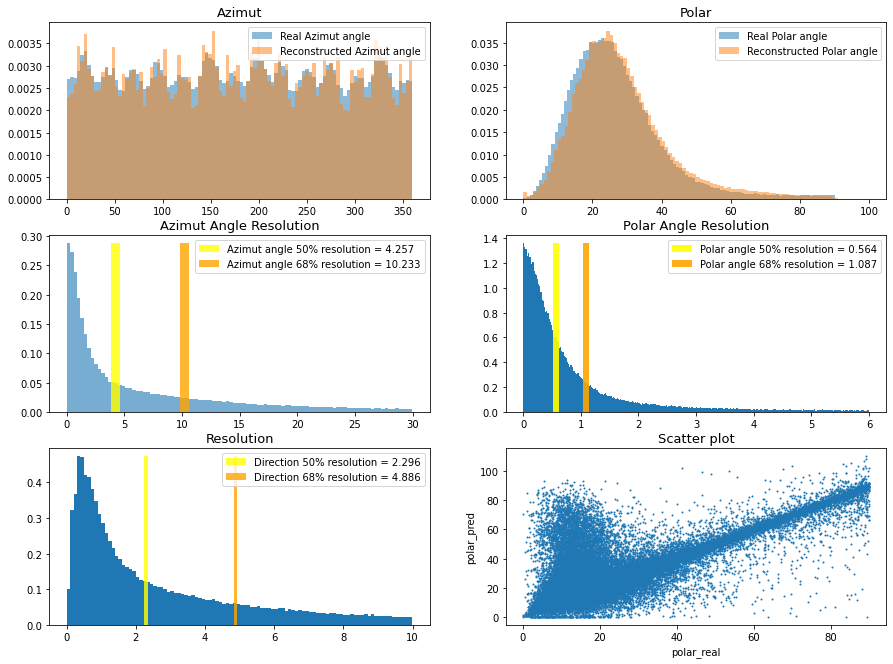

In [367]:
path_to_h5 = '/home/leonov/Baikal/Gr_data/mc_baikal_norm_cut-8_ordered_with_MCarlo.h5'
standart_resolution(path_to_h5)

In [418]:
def standart_resolution(path):
    with h5.File(path_to_h5, 'r') as hf:
        plt.figure(figsize= (15,15))
        print("length =", hf["train/ev_chars"].shape[0])
 
        polar_real = hf["train/ev_chars"][:,0]#/180*np.pi
        polar_pred = hf["train/ev_chars"][:,3]#/180*np.pi
        l_where = np.where((polar_real >=20) & (polar_real <=60))     #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        polar_pred = polar_pred[(polar_real >=20) & (polar_real <=60)]/180*np.pi #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        a_r = hf["train/ev_chars"][:,1]/180*np.pi
        a_p = hf["train/ev_chars"][:,-2]/180*np.pi        
        a_r = a_r[(polar_real >=20) & (polar_real <=60)] #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        a_p = a_p[(polar_real >=20) & (polar_real <=60)] #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        polar_real = polar_real[(polar_real >=20) & (polar_real <=60)]/180*np.pi #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        plt.subplot(4,2,1)
        plt.hist(a_r*180/np.pi,bins =  100,alpha =0.5,label = "Real Azimut angle",density = True)
        plt.hist(a_p*180/np.pi,bins =  100,alpha =0.5,label = "Reconstructed Azimut angle",density = True)
        plt.title("Azimut",fontsize = 13)
        plt.legend()
        plt.subplot(4,2,2)
        plt.hist(polar_real[polar_real<100/180*np.pi]*180/np.pi,
                 bins =  100,alpha =0.5,label = "Real Polar angle",density = True)
        plt.hist(polar_pred[polar_pred<100/180*np.pi]*180/np.pi,
                 bins =  100,alpha =0.5,label = "Reconstructed Polar angle",density = True)
        plt.title("Polar",fontsize = 13)
        plt.legend()
        #
        plt.subplot(4,2,3)
        res_az = np.arccos(np.round(np.cos(a_r)*np.cos(a_p)+np.sin(a_r)*np.sin(a_p),6))/np.pi*180
        res_hist = plt.hist(res_az[res_az<30], bins = 100, alpha = 0.6, density = True)
        res_50, res_68 = round(np.percentile(res_az,50),3), round(np.percentile(res_az,68),3)
        print("Azimut_error 50% and 68%",res_50 ,res_68 )
        plt.bar(res_50, max(res_hist[0]), width=0.8,label= "Azimut angle 50% resolution = "+str(res_50),
                color="yellow" , alpha =0.8 )
        plt.bar(res_68, max(res_hist[0]), width=0.8,label="Azimut angle 68% resolution = "+str(res_68) ,
                color="orange",alpha = 0.8)
        plt.legend()
        plt.title("Azimut Angle Resolution",fontsize = 13)
        #
        plt.subplot(4,2,4)
        polar_error =np.abs(polar_pred-polar_real)*180/np.pi
        a = plt.hist(polar_error[polar_error<6],bins = 300,density = True)
        res_50, res_68 = round(np.percentile(polar_error,50),3) , round(np.percentile(polar_error,68),3)
        print("Polar_error 50% and 68%",res_50, res_68 ) 
        plt.bar(res_50, max(a[0]), width=0.1,label= "Polar angle 50% resolution = "+str(res_50),
                color="yellow" , alpha =0.9 )
        plt.bar(res_68, max(a[0]), width=0.1,label="Polar angle 68% resolution = "+str(res_68) ,
                color="orange",alpha = 0.9)  
        plt.legend()
        plt.title("Polar Angle Resolution",fontsize = 13)
        #
        x_r = np.sin(polar_real)*np.cos(a_r)
        y_r = np.sin(polar_real)*np.sin(a_r)
        z_r = np.cos(polar_real)
        #
        x_p = np.sin(polar_pred)*np.cos(a_p)
        y_p = np.sin(polar_pred)*np.sin(a_p)
        z_p = np.cos(polar_pred)
        #
        plt.subplot(4,2,5)
        resolution = np.arccos(np.round(x_r*x_p + y_r*y_p + z_r*z_p,6))/np.pi*180
        res_50, res_68 = round(np.percentile(resolution,50),3),round(np.percentile(resolution,68),3)
        a = plt.hist(resolution[resolution<10],bins = 100,density = True)
        plt.bar(res_50, max(a[0]), width=0.1,label= "Direction 50% resolution = "+str(res_50),
                color="yellow" , alpha =0.8 )
        plt.bar(res_68, max(a[0]), width=0.1,label="Direction 68% resolution = "+str(res_68) ,
                color="orange",alpha = 0.8)  
        plt.title("Resolution",fontsize = 13)
        plt.legend()
        print("Resolution 50% and 68%", res_50, res_68)   
        plt.subplot(4,2,6)
        plt.scatter(polar_real[:124449]*180/np.pi,polar_pred[:124449]*180/np.pi,s =1)
        plt.xlabel("polar_real")
        plt.ylabel("polar_pred")
        plt.title("Scatter plot",fontsize = 13)
        '''
        plt.subplot(4,2,7)
        plt.scatter(polar_real*180/np.pi,polar_pred*180/np.pi,s =1)
        plt.xlabel("polar_real")
        plt.ylabel("polar_pred")
        plt.title("Scatter plot",fontsize = 13)
        
        plt.subplot(4,2,8)
        plt.scatter(a_r*180/np.pi,a_p*180/np.pi,s =1)
        plt.xlabel("Azimut real")
        plt.ylabel("Azimut pred")
        plt.title("Scatter Azimut plot",fontsize = 13)
        '''

length = 170301
Azimut_error 50% and 68% 2.688 6.407
Polar_error 50% and 68% 0.488 0.839
Resolution 50% and 68% 1.772 3.693


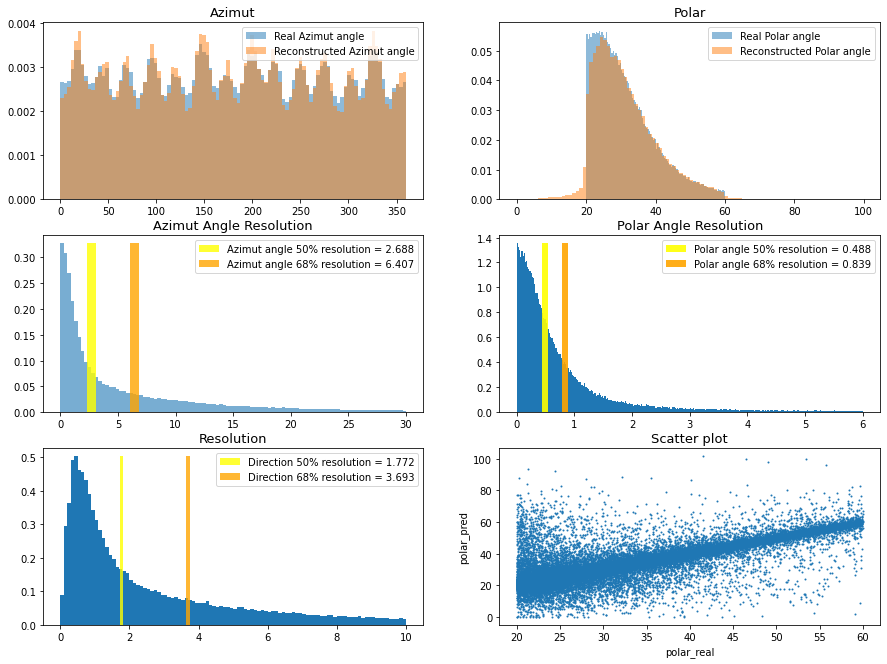

In [419]:
path_to_h5 = '/home/leonov/Baikal/Gr_data/mc_baikal_norm_cut-8_ordered_with_MCarlo.h5'
standart_resolution(path_to_h5)

In [420]:
def standart_resolution(path):
    with h5.File(path_to_h5, 'r') as hf:
        plt.figure(figsize= (15,15))
        print("length =", hf["train/ev_chars"].shape[0])
 
        polar_real = hf["train/ev_chars"][:,0]#/180*np.pi
        polar_pred = hf["train/ev_chars"][:,3]#/180*np.pi
        l_where = np.where((polar_real >=10) & (polar_real <=60))     #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        polar_pred = polar_pred[(polar_real >=10) & (polar_real <=60)]/180*np.pi #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        a_r = hf["train/ev_chars"][:,1]/180*np.pi
        a_p = hf["train/ev_chars"][:,-2]/180*np.pi        
        a_r = a_r[(polar_real >=10) & (polar_real <=60)] #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        a_p = a_p[(polar_real >=10) & (polar_real <=60)] #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        polar_real = polar_real[(polar_real >=10) & (polar_real <=60)]/180*np.pi #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        plt.subplot(4,2,1)
        plt.hist(a_r*180/np.pi,bins =  100,alpha =0.5,label = "Real Azimut angle",density = True)
        plt.hist(a_p*180/np.pi,bins =  100,alpha =0.5,label = "Reconstructed Azimut angle",density = True)
        plt.title("Azimut",fontsize = 13)
        plt.legend()
        plt.subplot(4,2,2)
        plt.hist(polar_real[polar_real<100/180*np.pi]*180/np.pi,
                 bins =  100,alpha =0.5,label = "Real Polar angle",density = True)
        plt.hist(polar_pred[polar_pred<100/180*np.pi]*180/np.pi,
                 bins =  100,alpha =0.5,label = "Reconstructed Polar angle",density = True)
        plt.title("Polar",fontsize = 13)
        plt.legend()
        #
        plt.subplot(4,2,3)
        res_az = np.arccos(np.round(np.cos(a_r)*np.cos(a_p)+np.sin(a_r)*np.sin(a_p),6))/np.pi*180
        res_hist = plt.hist(res_az[res_az<30], bins = 100, alpha = 0.6, density = True)
        res_50, res_68 = round(np.percentile(res_az,50),3), round(np.percentile(res_az,68),3)
        print("Azimut_error 50% and 68%",res_50 ,res_68 )
        plt.bar(res_50, max(res_hist[0]), width=0.8,label= "Azimut angle 50% resolution = "+str(res_50),
                color="yellow" , alpha =0.8 )
        plt.bar(res_68, max(res_hist[0]), width=0.8,label="Azimut angle 68% resolution = "+str(res_68) ,
                color="orange",alpha = 0.8)
        plt.legend()
        plt.title("Azimut Angle Resolution",fontsize = 13)
        #
        plt.subplot(4,2,4)
        polar_error =np.abs(polar_pred-polar_real)*180/np.pi
        a = plt.hist(polar_error[polar_error<6],bins = 300,density = True)
        res_50, res_68 = round(np.percentile(polar_error,50),3) , round(np.percentile(polar_error,68),3)
        print("Polar_error 50% and 68%",res_50, res_68 ) 
        plt.bar(res_50, max(a[0]), width=0.1,label= "Polar angle 50% resolution = "+str(res_50),
                color="yellow" , alpha =0.9 )
        plt.bar(res_68, max(a[0]), width=0.1,label="Polar angle 68% resolution = "+str(res_68) ,
                color="orange",alpha = 0.9)  
        plt.legend()
        plt.title("Polar Angle Resolution",fontsize = 13)
        #
        x_r = np.sin(polar_real)*np.cos(a_r)
        y_r = np.sin(polar_real)*np.sin(a_r)
        z_r = np.cos(polar_real)
        #
        x_p = np.sin(polar_pred)*np.cos(a_p)
        y_p = np.sin(polar_pred)*np.sin(a_p)
        z_p = np.cos(polar_pred)
        #
        plt.subplot(4,2,5)
        resolution = np.arccos(np.round(x_r*x_p + y_r*y_p + z_r*z_p,6))/np.pi*180
        res_50, res_68 = round(np.percentile(resolution,50),3),round(np.percentile(resolution,68),3)
        a = plt.hist(resolution[resolution<10],bins = 100,density = True)
        plt.bar(res_50, max(a[0]), width=0.1,label= "Direction 50% resolution = "+str(res_50),
                color="yellow" , alpha =0.8 )
        plt.bar(res_68, max(a[0]), width=0.1,label="Direction 68% resolution = "+str(res_68) ,
                color="orange",alpha = 0.8)  
        plt.title("Resolution",fontsize = 13)
        plt.legend()
        print("Resolution 50% and 68%", res_50, res_68)   
        plt.subplot(4,2,6)
        plt.scatter(polar_real[:124449]*180/np.pi,polar_pred[:124449]*180/np.pi,s =1)
        plt.xlabel("polar_real")
        plt.ylabel("polar_pred")
        plt.title("Scatter plot",fontsize = 13)
        '''
        plt.subplot(4,2,7)
        plt.scatter(polar_real*180/np.pi,polar_pred*180/np.pi,s =1)
        plt.xlabel("polar_real")
        plt.ylabel("polar_pred")
        plt.title("Scatter plot",fontsize = 13)
        
        plt.subplot(4,2,8)
        plt.scatter(a_r*180/np.pi,a_p*180/np.pi,s =1)
        plt.xlabel("Azimut real")
        plt.ylabel("Azimut pred")
        plt.title("Scatter Azimut plot",fontsize = 13)
        '''

length = 170301
Azimut_error 50% and 68% 3.831 9.212
Polar_error 50% and 68% 0.528 0.98
Resolution 50% and 68% 2.113 4.493


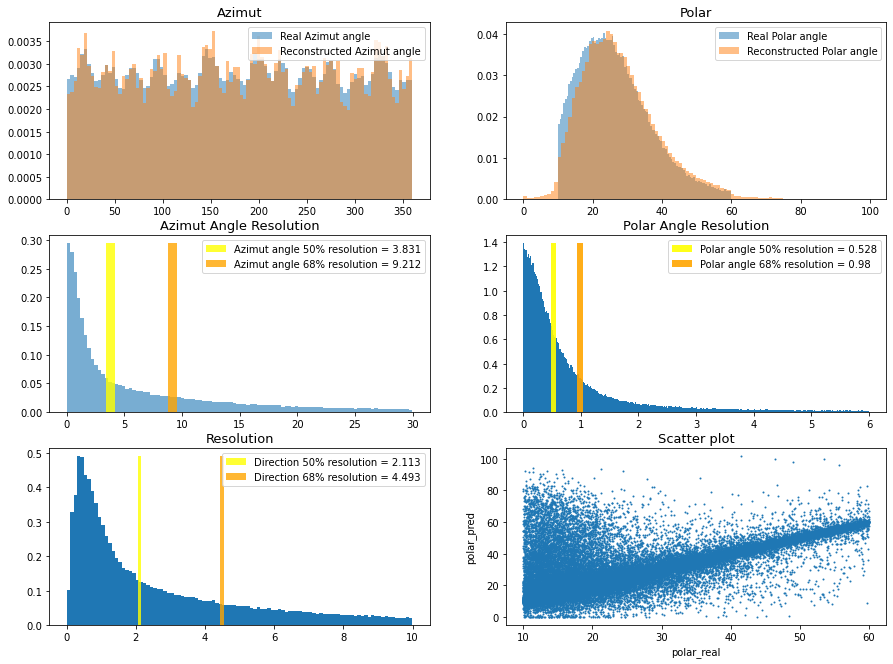

In [421]:
path_to_h5 = '/home/leonov/Baikal/Gr_data/mc_baikal_norm_cut-8_ordered_with_MCarlo.h5'
standart_resolution(path_to_h5)

In [449]:
min_angle,max_angle =0,80
def standart_resolution(path):
    with h5.File(path_to_h5, 'r') as hf:
        plt.figure(figsize= (10,18))
        plt.subplot(2,1,1)
        polar_real = hf["train/ev_chars"][:,0]#/180*np.pi
        polar_pred = hf["train/ev_chars"][:,3]#/180*np.pi
        polar_pred = polar_pred[(polar_real >=min_angle) & (polar_real <=max_angle)]/180*np.pi #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        a_r = hf["train/ev_chars"][:,1]/180*np.pi
        a_p = hf["train/ev_chars"][:,-2]/180*np.pi        
        a_r = a_r[(polar_real >=min_angle) & (polar_real <=max_angle)] #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        a_p = a_p[(polar_real >=min_angle) & (polar_real <=max_angle)] #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        polar_real = polar_real[(polar_real >=min_angle) & (polar_real <=max_angle)]/180*np.pi

        #
  
        
        plt.scatter(polar_real*180/np.pi,polar_pred*180/np.pi,s =1,alpha = 0.1) #124449
        plt.xlabel("Polar_real", fontsize = label_size,loc="right")
        plt.ylabel("Polar_pred", fontsize = label_size,loc = "top")
        plt.title("Scatter plot",fontsize = title_size)
        '''
        plt.subplot(4,2,7)
        plt.scatter(polar_real*180/np.pi,polar_pred*180/np.pi,s =1)
        plt.xlabel("polar_real")
        plt.ylabel("polar_pred")
        plt.title("Scatter plot",fontsize = 13)
        '''
        plt.subplot(2,1,2)
        plt.scatter(a_r*180/np.pi,a_p*180/np.pi,s =1,alpha = 0.1)
        plt.xlabel("Azimut real")
        plt.ylabel("Azimut pred")
        plt.title("Scatter Azimut plot",fontsize = 13)
        

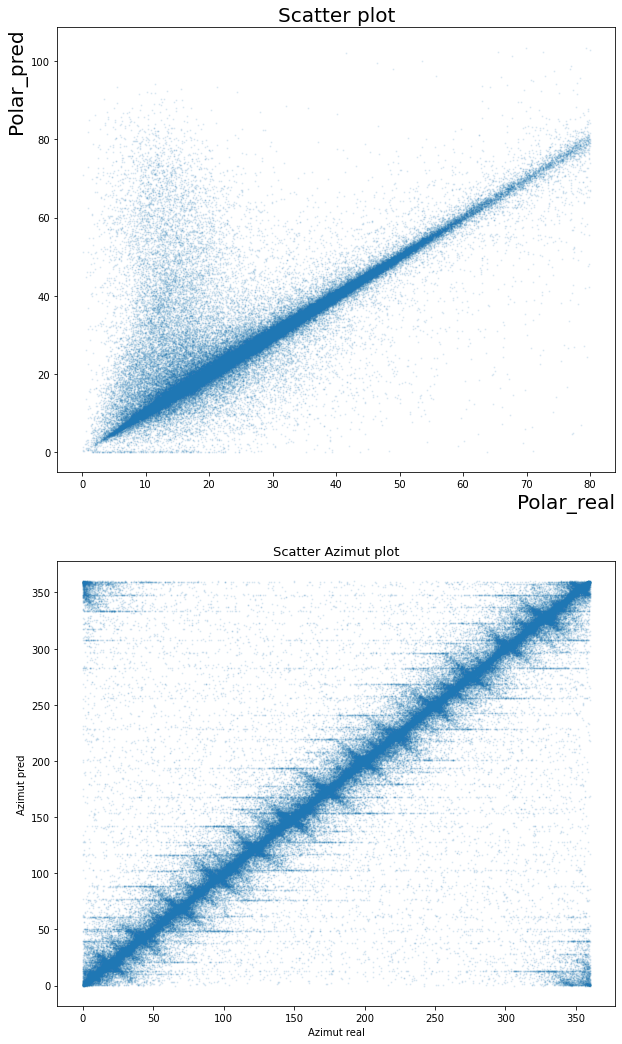

In [450]:
path_to_h5 = '/home/leonov/Baikal/Gr_data/mc_baikal_norm_cut-8_ordered_with_MCarlo.h5'
standart_resolution(path_to_h5)

length = 170301
Azimut_error 50% and 68% 4.257 10.233
Resolution 50% and 68% 2.296 4.886


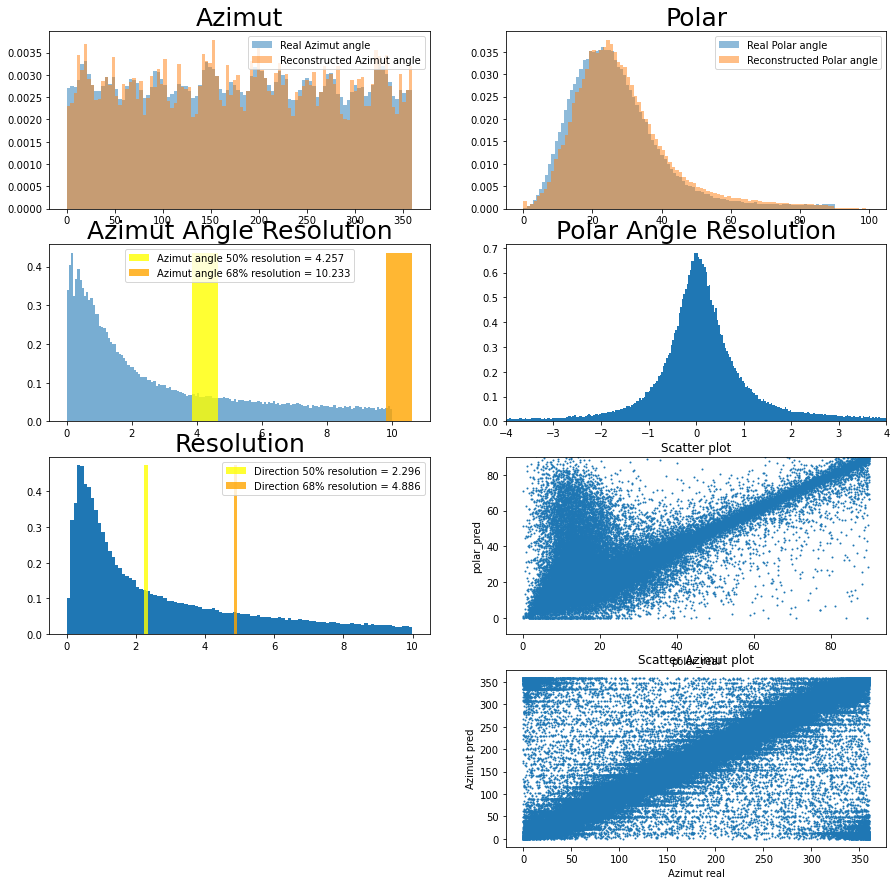

In [16]:
def standart_resolution(path):
    with h5.File(path_to_h5, 'r') as hf:
        plt.figure(figsize= (15,15))
        print("length =", hf["train/ev_chars"].shape[0])
        a_r = hf["train/ev_chars"][:,1]/180*np.pi
        a_p = hf["train/ev_chars"][:,-2]/180*np.pi 
        polar_real = hf["train/ev_chars"][:,0]/180*np.pi
        polar_pred = hf["train/ev_chars"][:,3]/180*np.pi
        plt.subplot(4,2,1)
        plt.hist(a_r*180/np.pi,bins =  100,alpha =0.5,label = "Real Azimut angle",density = True)
        plt.hist(a_p*180/np.pi,bins =  100,alpha =0.5,label = "Reconstructed Azimut angle",density = True)
        plt.title("Azimut",fontsize = 25)
        plt.legend()
        plt.subplot(4,2,2)
        plt.hist(polar_real[polar_real<100/180*np.pi]*180/np.pi,
                 bins =  100,alpha =0.5,label = "Real Polar angle",density = True)
        plt.hist(polar_pred[polar_pred<100/180*np.pi]*180/np.pi,
                 bins =  100,alpha =0.5,label = "Reconstructed Polar angle",density = True)
        plt.title("Polar",fontsize = 25)
        plt.legend()
        #
        plt.subplot(4,2,3)
        res_az = np.arccos(np.round(np.cos(a_r)*np.cos(a_p)+np.sin(a_r)*np.sin(a_p),6))/np.pi*180
        res_hist = plt.hist(res_az[res_az<10], bins = 150, alpha = 0.6, density = True)
        res_50, res_68 = round(np.percentile(res_az,50),3), round(np.percentile(res_az,68),3)
        print("Azimut_error 50% and 68%",res_50 ,res_68 )
        plt.bar(res_50, max(res_hist[0]), width=0.8,label= "Azimut angle 50% resolution = "+str(res_50),
                color="yellow" , alpha =0.8 )
        plt.bar(res_68, max(res_hist[0]), width=0.8,label="Azimut angle 68% resolution = "+str(res_68) ,
                color="orange",alpha = 0.8)
        plt.legend()
        plt.title("Azimut Angle Resolution",fontsize = 25)
        #
        plt.subplot(4,2,4)
        polar_error =(polar_pred-polar_real)*180/np.pi 
        a = plt.hist(polar_error[np.abs(polar_error)<5],bins = 300,density = True)
        #res_50, res_68 = round(np.percentile(polar_error,50),3) , round(np.percentile(polar_error,68),3)
        #print("Polar_error 50% and 68%",res_50, res_68 ) 
        #plt.bar(res_50, max(a[0]), width=0.1,label= "Polar angle 50% resolution = "+str(res_50),
        #        color="yellow" , alpha =0.9 )
        #plt.bar(res_68, max(a[0]), width=0.1,label="Polar angle 68% resolution = "+str(res_68) ,
        #        color="orange",alpha = 0.9)  
        #plt.legend()
        plt.xlim(left = -4,right = 4)
        plt.title("Polar Angle Resolution",fontsize = 25)
        #
        x_r = np.sin(polar_real)*np.cos(a_r)
        y_r = np.sin(polar_real)*np.sin(a_r)
        z_r = np.cos(polar_real)
        #
        x_p = np.sin(polar_pred)*np.cos(a_p)
        y_p = np.sin(polar_pred)*np.sin(a_p)
        z_p = np.cos(polar_pred)
        #
        plt.subplot(4,2,5)
        resolution = np.arccos(np.round(x_r*x_p + y_r*y_p + z_r*z_p,6))/np.pi*180
        res_50, res_68 = round(np.percentile(resolution,50),3),round(np.percentile(resolution,68),3)
        a = plt.hist(resolution[resolution<10],bins = 100,density = True)
        plt.bar(res_50, max(a[0]), width=0.1,label= "Direction 50% resolution = "+str(res_50),
                color="yellow" , alpha =0.8 )
        plt.bar(res_68, max(a[0]), width=0.1,label="Direction 68% resolution = "+str(res_68) ,
                color="orange",alpha = 0.8)  
        plt.title("Resolution",fontsize = 25)
        plt.legend()
        print("Resolution 50% and 68%", res_50, res_68)   
        plt.subplot(4,2,6)
        plt.scatter(polar_real*180/np.pi,polar_pred*180/np.pi,s =1)
        plt.xlabel("polar_real")
        plt.ylabel("polar_pred")
        plt.title("Scatter plot")
        plt.ylim(top = 90)

        plt.subplot(4,2,8)
        plt.scatter(a_r*180/np.pi,a_p*180/np.pi,s =1)
        plt.xlabel("Azimut real")
        plt.ylabel("Azimut pred")
        plt.title("Scatter Azimut plot")
standart_resolution(path_to_h5)